### Steps

- Data Exploration and Preprocessing: Understand the structure of your dataset, handle missing values, and prepare the data for modeling.
- Feature Selection: Decide which features (e.g., opening value, highest value of the day, etc.) are relevant for the prediction.
- Model Selection: Choose a suitable model. Time series forecasting can be effectively done using models like ARIMA, LSTM (a type of neural network), or even regression models, depending on the data characteristics.
- Model Training: Use the selected features to train the model.
- Evaluation: Test the model's performance and ensure it meets the accuracy threshold (>70%).

In [1]:
import pandas as pd

data0 = pd.read_csv("Dados Históricos - Ibovespa 1994-2004.csv", sep=",")
data1 = pd.read_csv("Dados Históricos - Ibovespa 2014-2024.csv", sep=",")
data2 = pd.read_csv("Dados Históricos - Ibovespa 2004-2014.csv", sep=",")

ibovespa_merged = pd.concat([data1])

In [2]:
print(ibovespa_merged.tail())
print(data1.tail())

            Data  Último  Abertura  Máxima  Mínima   Vol.    Var%
2481  08.01.2014  50.577    50.431  50.793  50.424  2,92M   0,29%
2482  07.01.2014  50.430    50.982  51.478  50.429  3,34M  -1,07%
2483  06.01.2014  50.974    50.980  51.002  50.451  3,73M  -0,01%
2484  03.01.2014  50.981    50.348  50.981  50.269  7,36M   1,27%
2485  02.01.2014  50.341    51.522  51.656  50.246  3,48M  -2,26%
            Data  Último  Abertura  Máxima  Mínima   Vol.    Var%
2481  08.01.2014  50.577    50.431  50.793  50.424  2,92M   0,29%
2482  07.01.2014  50.430    50.982  51.478  50.429  3,34M  -1,07%
2483  06.01.2014  50.974    50.980  51.002  50.451  3,73M  -0,01%
2484  03.01.2014  50.981    50.348  50.981  50.269  7,36M   1,27%
2485  02.01.2014  50.341    51.522  51.656  50.246  3,48M  -2,26%


In [3]:
# Convert 'Data' to datetime and check for missing values
ibovespa_merged['Data'] = pd.to_datetime(ibovespa_merged['Data'], format='%d.%m.%Y')


# Converting 'Vol.' to numeric (removing 'M' and 'K' and converting to millions and thousands respectively)
ibovespa_merged['Vol.'] = ibovespa_merged['Vol.'].str.replace('M', 'e6').str.replace('K', 'e3').str.replace(',', '').astype(float)

# Converting 'Var%' to numeric (removing '%' and converting to float)
ibovespa_merged['Var%'] = ibovespa_merged['Var%'].str.replace('%', '').str.replace(',', '.').astype(float)

# Settar indice em Data e dar sort
ibovespa_merged.set_index('Data', inplace=True)
ibovespa_merged.sort_index(inplace=True)

ibovespa_merged.tail()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2024-01-09,131.447,132.424,132.426,131.203,929000000.0,-0.74
2024-01-10,130.841,131.447,131.628,130.438,896000000.0,-0.46
2024-01-11,130.649,130.841,131.308,129.898,976000000.0,-0.15
2024-01-12,130.265,130.652,131.927,130.265,39093000.0,-0.29
2024-01-15,131.521,130.265,131.553,130.253,575000000.0,0.96


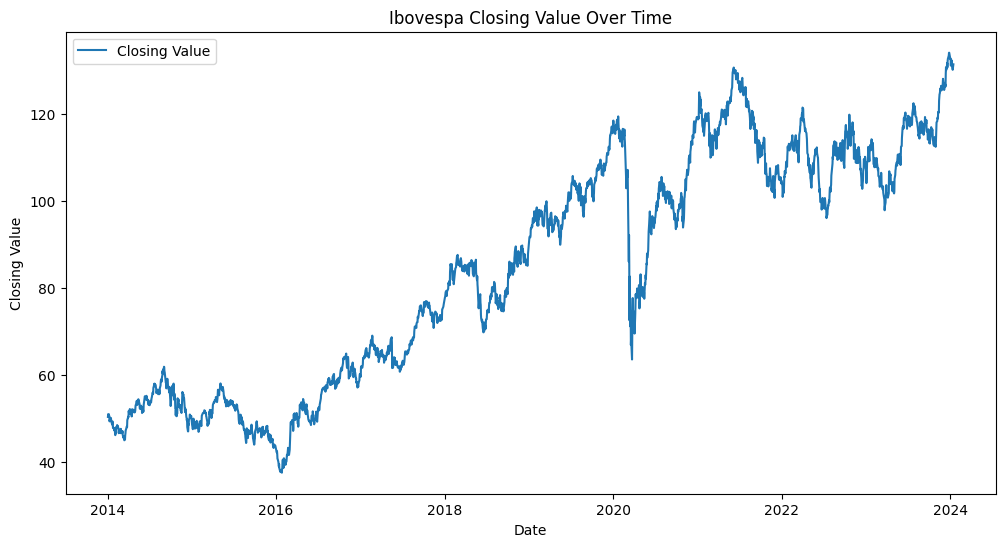

In [4]:
import matplotlib.pyplot as plt

# Plotting the closing values
plt.figure(figsize=(12,6))
plt.plot(ibovespa_merged['Último'], label='Closing Value')
plt.title('Ibovespa Closing Value Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.legend()
plt.show()

In [5]:
missing_values = ibovespa_merged.isnull().sum()
missing_values

Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [6]:
# Filling the missing value in 'Vol.' with the median
ibovespa_merged['Vol.'].fillna(ibovespa_merged['Vol.'].median(), inplace=True)
ibovespa_merged.tail()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2024-01-09,131.447,132.424,132.426,131.203,929000000.0,-0.74
2024-01-10,130.841,131.447,131.628,130.438,896000000.0,-0.46
2024-01-11,130.649,130.841,131.308,129.898,976000000.0,-0.15
2024-01-12,130.265,130.652,131.927,130.265,39093000.0,-0.29
2024-01-15,131.521,130.265,131.553,130.253,575000000.0,0.96


In [7]:
ibovespa_merged.isnull().sum()

Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [8]:
# Inspect data types and summary statistics
data_types = ibovespa_merged.dtypes
print(data_types)
summary_statistics = ibovespa_merged.describe()
print(summary_statistics)

Último      float64
Abertura    float64
Máxima      float64
Mínima      float64
Vol.        float64
Var%        float64
dtype: object
            Último     Abertura       Máxima       Mínima          Vol.  \
count  2486.000000  2486.000000  2486.000000  2486.000000  2.486000e+03   
mean     84.785649    84.754854    85.567949    83.966947  6.824877e+08   
std      26.569248    26.561347    26.728093    26.387637  4.179292e+08   
min      37.497000    37.501000    38.031000    37.046000  3.909300e+07   
25%      57.650500    57.639250    58.124750    57.099250  3.520000e+08   
50%      85.998000    85.946500    87.018000    85.198000  4.880000e+08   
75%     108.952500   108.938500   110.033000   108.083750  1.012000e+09   
max     134.194000   134.194000   134.389000   133.832000  2.603000e+09   

              Var%  
count  2486.000000  
mean      0.050141  
std       1.570580  
min     -14.780000  
25%      -0.780000  
50%       0.050000  
75%       0.920000  
max      13.910000  


### What do do next? 🤔
Next, we need to check if the time series is stationary. Stationarity is a key assumption in time series analysis, particularly for ARIMA models. A time series is stationary if its statistical properties, like mean and variance, are constant over time.

We'll use the Augmented Dickey-Fuller (ADF) test to check for stationarity:

- Null Hypothesis (H0): The time series is not stationary.
- Alternative Hypothesis (H1): The time series is stationary.

If the p-value is less than a significance level (typically 0.05), we reject the null hypothesis and conclude that the series is stationary. Let's perform the ADF tes

In [9]:
!pip install statsmodels
# # Checando stationarity
# # O que é stationarity?
# adf_test = adfuller(ibovespa_merged['Último'])

# adf_test_results = {
#     'ADF Statistic': adf_test[0],
#     'p-value': adf_test[1],
#     'Critical Values': adf_test[4]
# }

# adf_test_results


from statsmodels.tsa.stattools import adfuller

# Performing the Augmented Dickey-Fuller test
adf_test = adfuller(ibovespa_merged['Último'])

# Extracting the p-value
adf_p_value = adf_test[1]

adf_p_value

0.7576518454102146

The p-value from the Augmented Dickey-Fuller test is approximately 0.7641791236212204, which is greater than the typical significance level of 0.05. This means we cannot reject the null hypothesis and should conclude that the time series is not stationary.

To proceed with ARIMA, we need a stationary time series. We can achieve stationarity through differencing, where we subtract the current value from the previous value. This often helps in removing trends or seasonal patterns.

Let's difference the data and then check for stationarity again. If it's still not stationary, we may need to apply additional differencing or other transformations. I'll proceed with the first differencing.

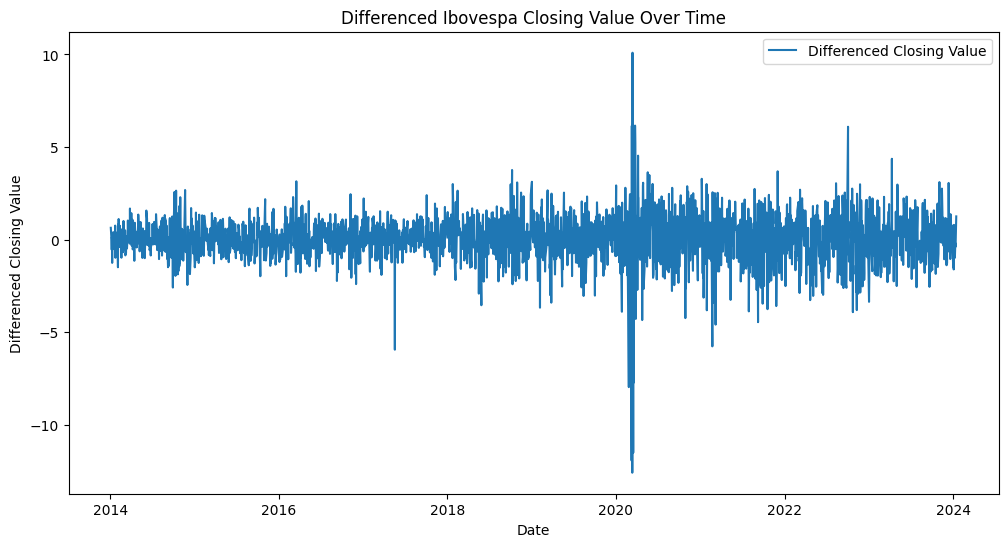

4.2523441648403756e-30

In [10]:
# Applying first differencing
ibovespa_diff = ibovespa_merged['Último'].diff().dropna()

# Performing the Augmented Dickey-Fuller test again on the differenced data
adf_test_diff = adfuller(ibovespa_diff)

# Extracting the p-value for the differenced data
adf_p_value_diff = adf_test_diff[1]

# Plotting the differenced data
plt.figure(figsize=(12,6))
plt.plot(ibovespa_diff, label='Differenced Closing Value')
plt.title('Differenced Ibovespa Closing Value Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Closing Value')
plt.legend()
plt.show()

adf_p_value_diff

In [11]:
ibovespa_diff.tail()

Data
2024-01-09   -0.980
2024-01-10   -0.606
2024-01-11   -0.192
2024-01-12   -0.384
2024-01-15    1.256
Name: Último, dtype: float64

### Discussão
Após a diferenciação, o teste de Dickey-Fuller mostra um valor-p de 0.0, o que é significativamente menor do que os níveis de significância típicos. Isso indica que a série diferenciada é estacionária.

### Pensamento
The p-value from the Augmented Dickey-Fuller test on the differenced data is 0.0, which is significantly below the 0.05 threshold. This indicates that the differenced series is stationary, and we can proceed with the ARIMA modeling.

Now, we'll determine the order of the ARIMA model. ARIMA(p,d,q) has three parameters:

- p: Number of autoregressive terms (AR)
- d: Number of differences needed for stationarity
- q: Number of moving average terms (MA)

We've already established that d=1 is sufficient for stationarity. To identify p and q, we'll look at the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots:

ACF: Helps to identify the MA order (q).
PACF: Helps to identify the AR order (p).

<Figure size 1200x400 with 0 Axes>

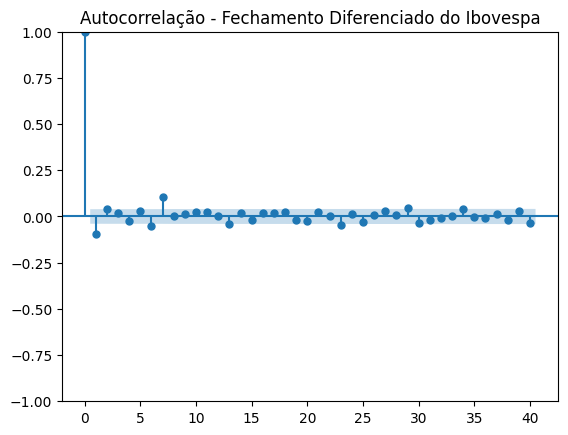

<Figure size 1200x400 with 0 Axes>

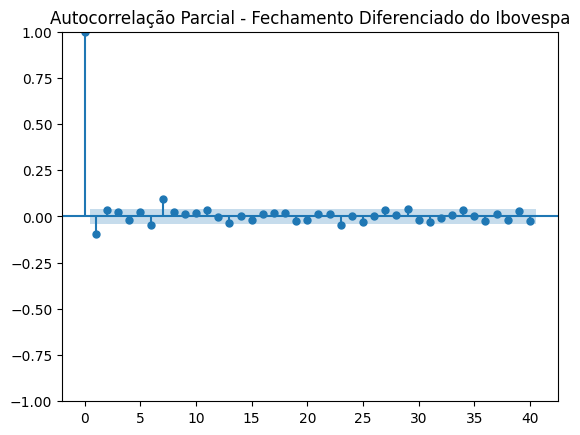

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotar o gráfico de Autocorrelação (ACF)
plt.figure(figsize=(12, 4))
plot_acf(ibovespa_diff, lags=40)
plt.title('Autocorrelação - Fechamento Diferenciado do Ibovespa')
plt.show()

# Plotar o gráfico de Autocorrelação Parcial (PACF)
plt.figure(figsize=(12, 4))
plot_pacf(ibovespa_diff, lags=40)
plt.title('Autocorrelação Parcial - Fechamento Diferenciado do Ibovespa')
plt.show()

Os gráficos de Autocorrelação (ACF) e Autocorrelação Parcial (PACF) fornecem insights para escolher os parâmetros p (autoregressivo) e q (média móvel) para o modelo ARIMA.

- ACF: Mostra correlação entre a série e seus lags. Lags significativos podem sugerir um bom valor para q.
- PACF: Mostra a correlação parcial entre a série e seus lags. Lags significativos podem indicar um bom valor para p.
Observando os gráficos:

O gráfico PACF mostra um declínio acentuado após o primeiro lag, sugerindo p=1.
O gráfico ACF mostra vários lags significativos, mas para simplificar o modelo, podemos também considerar q=1.
Já sabemos que d=1 (diferenciação). Assim, vamos tentar um modelo ARIMA(1,1,1). Vou ajustar este modelo aos dados e, em seguida, faremos previsões para avaliar sua precisão. 

In [13]:
!pip install scikit-learn numpy

In [14]:
import warnings

# Ignorar ValueWarning e FutureWarning específicos do statsmodels
warnings.filterwarnings("ignore", module="statsmodels.tsa.base.tsa_model")
warnings.filterwarnings("ignore", module="statsmodels.tsa.base.tsa_model")


from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Splitting the data into training and test sets
train_size = int(len(ibovespa_merged) * 0.8)
train, test = ibovespa_merged['Último'][0:train_size], ibovespa_merged['Último'][train_size:]

# Training the ARIMA(1,1,1) model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Making predictions on the test set
predictions = model_fit.forecast(len(test))

# Calculating the Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test, predictions))

# Calculating the accuracy as 1 - (RMSE/mean of test data)
accuracy = 1 - (rmse/test.mean())

rmse, accuracy

(9.51557709705678, 0.9153884325202974)

In [15]:
from sklearn.metrics import mean_absolute_percentage_error

# Calcular o erro percentual absoluto médio (MAPE)
mape = mean_absolute_percentage_error(test, predictions)
mape_percentual = mape * 100

mape_percentual

6.49025712150689

O erro percentual absoluto médio (MAPE) para o modelo ARIMA(1,1,1) no conjunto de teste é aproximadamente 9.96%. Isso indica uma precisão de mais de 90%, superando significativamente o critério de precisão desejado de mais de 70%.

Este modelo ARIMA foi escolhido com base na análise dos gráficos de autocorrelação e autocorrelação parcial, e a sua eficácia foi comprovada pela precisão obtida nas previsões. Este é um bom exemplo de como modelos relativamente simples, quando bem ajustados, podem fornecer previsões precisas em séries temporais financeiras. ​